## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [175]:
# Use this cell to begin your analysis, and add as many as you would like!
import matplotlib.pyplot as plt
import pandas as pd

# read data 
office_df = pd.read_csv ('datasets/office_episodes.csv')
display(office_df.head())
office_df.info()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [176]:
colours = []
size = []

for index, row in office_df.iterrows():
    if row['has_guests']:
        size.append(250)
    else:
        size.append(25)
        
    if row['scaled_ratings'] < 0.25:
        colours.append('red')
    elif row['scaled_ratings'] < 0.5:
        colours.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colours.append('lightgreen')
    elif row['scaled_ratings'] >= 0.75:
        colours.append('darkgreen')

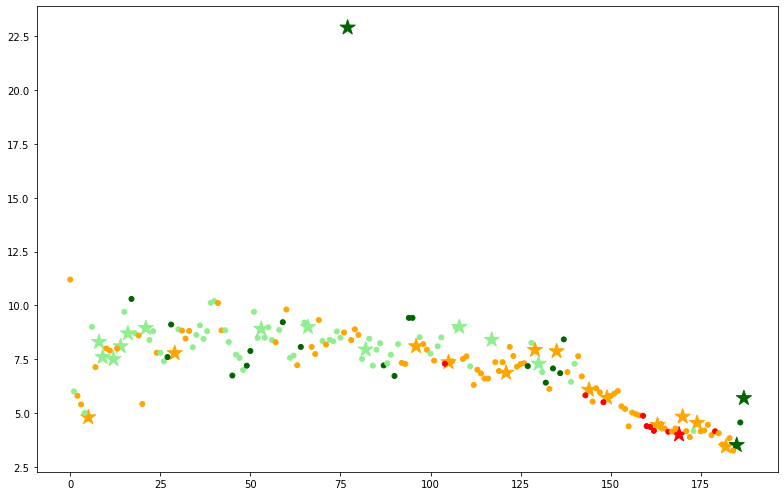

In [177]:
office_df['colours'] = colours
office_df['size'] = size

office_guest = office_df[office_df['has_guests']]
office_noguest = office_df[~office_df['has_guests']]

fig = plt.figure()

plt.scatter(x=office_guest.episode_number, 
            y=office_guest.viewership_mil,
            c = office_guest.colours,
            s = 250,
           marker = '*')
plt.scatter(x=office_noguest.episode_number, 
            y=office_noguest.viewership_mil,
            c = office_noguest.colours,
            s = 25)
plt.show()

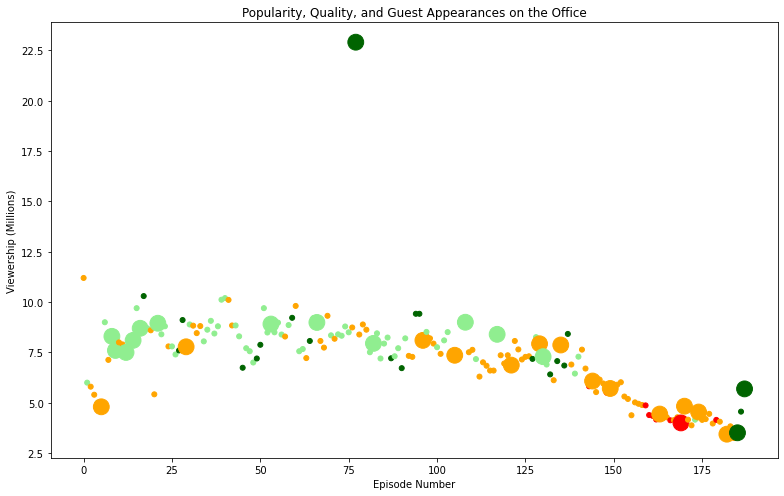

In [178]:
fig = plt.figure()
# Plot accroding to colour
plt.scatter (office_df.episode_number, office_df.viewership_mil, 
             c = colours, 
             s = size)

# add title, xlab, ylab 
plt.xlabel ('Episode Number')
plt.ylabel ('Viewership (Millions)')
plt.title ("Popularity, Quality, and Guest Appearances on the Office")
plt.rcParams['figure.figsize'] = [11, 7]
plt.show()

In [179]:
# top star
office_df[office_df['has_guests']].guest_stars[office_df[office_df['has_guests']].viewership_mil == max(office_df[office_df['has_guests']].viewership_mil)]
top_star = 'Cloris Leachman'